# ObsID : 0945020132, SRCNUM : 7, Instru : EPN
**Simbad :** Quasar (COMBO J0333017-275819)
https://simbad.cds.unistra.fr/simbad/sim-id?Ident=%40651085&Name=COMBO%20J0333017-275819&submit=submit

## ESASky
On ESASky, we observe optically that there are 2 very close sources, a blue one on which the EPIC cursor is placed and a yellow one. https://sky.esa.int/esasky/?target=53.2575%20-27.971638888888886&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

**Source bleue :** (most likely source)

``EPIC Stack``
- Stack Catalogue name : 4XMMs J033301.7-275819
- IAU name : 4XMM J033301.6-275818
- RA : 03h 33m 01.706s
- DEC : -27° 58' 19.02"
- Flux : 7.916E-14 ergs/cm^2/s

``GAIA``
- Designation : Gaia DR3 5057482939190327168
- RA : 03h 33m 01.709s
- DEC : -27° 58' 18.91"
- Parallax : 2.4442 mas
- G (mag) : 20.5353

**Source jaune :** (source la moins probable)

``GLADE``
- Numero : 1 689 423
- RA : 03h 33m 01.008s
- DEC : -27° 58' 08.72"
- DLC : 5124.4652 Mpc

``2MASS``
- Name : 03330155-2758115
- RA : 03h 33m 01.555s
- DEC : -27° 58' 11.52"

``GAIA``
- Designation : Gaia DR3 5057482943486276480
- RA : 03h 33m 01.560s
- DEC : -27° 58' 11.49"
- Parallax : 1.469 mas
- G (mag) : 16.1475

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]
Fit.statMethod = "cstat"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [2]:
spec = Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp_cstat.fits')[0])

***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: ObsID0945020132_SRCNUM7_EMOS2_spectrum_grp_cstat.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.772e-03 +/- 8.480e-04 (65.5 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-47
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 8682 sec
 Using fit statistic: cstat
 Using Background File                ObsID0945020132_SRCNUM7_EMOS2_background_spectrum.fits
  Background Exposure Time: 8682 sec
 Using Response (RMF) File            ObsID0945020132_SRCNUM7_EMOS2.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945020132_SRCNUM7_EMOS2.arf



In [3]:
n_cts = 8682*3.772e-03

print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 32.748504000000004

The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.


## Plot spectrum

In [4]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00000001 0.05")
Plot("data")
spec.ignore("**-0.2 12-**")

     3 channels (1-3) ignored in spectrum #     1
    36 channels (12,47) ignored in spectrum #     1



(-0.5, 856.5, 661.5, -0.5)

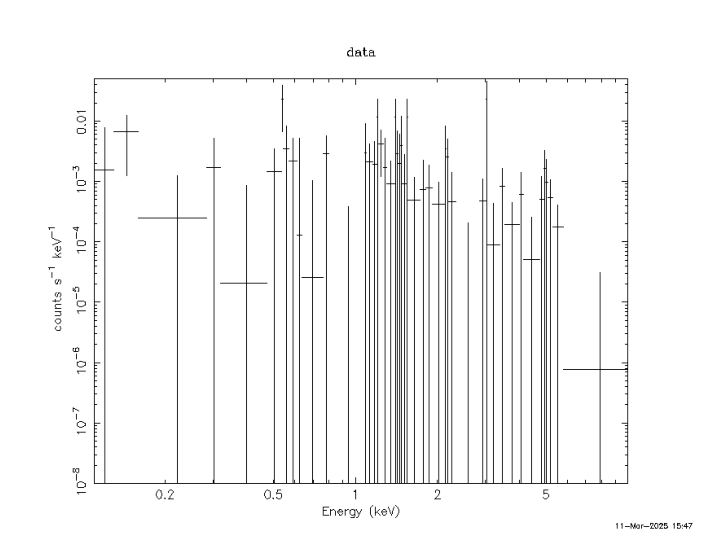

In [5]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum.png")[0])
plt.imshow(img)
plt.axis('off')

### Black body model
**tbabs :**

In [11]:
AllModels.clear()
mo = Model("tbabs*bbody")
mo.bbody.norm = 7.30863e-05
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                21926.58     using 8 bins.

Test statistic : Chi-Squared              2.203751e+07     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic                  8.9195     using 8 bins.

Test statistic : Chi-Squared                  3.5821     using 8 bins.
 Null hypothesis probability of 6.1101e-01 with 5 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:

(-0.5, 855.5, 661.5, -0.5)

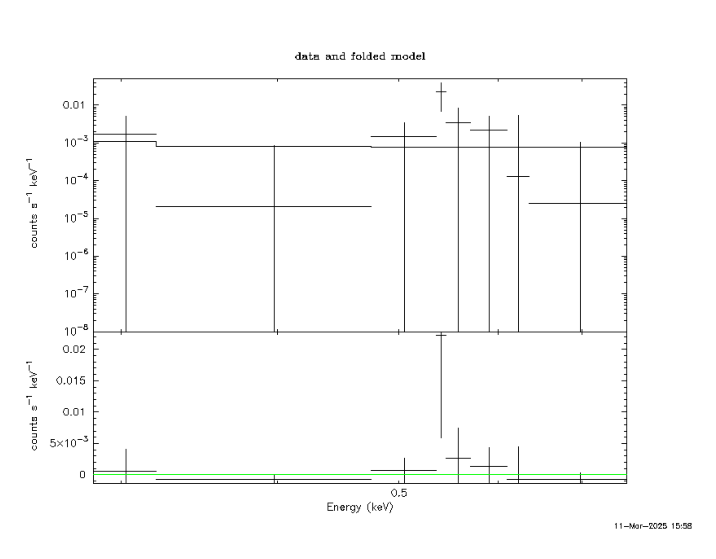

In [12]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bbody.png")[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [18]:
def redshift(d_Mpc):
    H0 = 70 # Hubble constant (km/s/Mpc)
    c = 299792.458 # km/s
    return H0*d_Mpc/c

z = redshift(5124.4652)
print("Redshift : z =", z)
    
AllModels.clear()
moz = Model("ztbabs*bbody")
moz.zTBabs.Redshift = z
moz.bbody.norm = 0.00001
Fit.perform()
Plot.device = "/xs"
Plot("data resid")

Redshift : z = 1.196536318468692

Model zTBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   bbody      kT         keV      3.00000      +/-  0.0          
   4    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                21857.51     using 8 bins.

Test statistic : Chi-Squared              2.189836e+07     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic                62001.02     using 8 bins.

Test statistic : Chi-Squared              2.074831e+08     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and mode

In [ ]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bbody_z.png")[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model
**tbabs :**

In [13]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                12886.58     using 8 bins.

Test statistic : Chi-Squared              8.162942e+06     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm
9.62503      3985.79      -3       2494.65      0.432454       4314.79
8.03515      2.11256e-16  14       917.347       2.50562       505004.
8.03515      0.109237     13       917.347       2.50562       505004.
 Vari

(-0.5, 856.5, 661.5, -0.5)

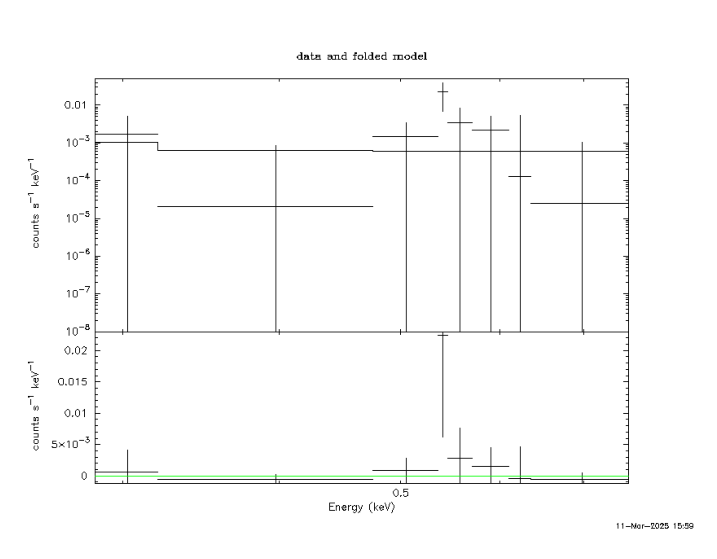

In [14]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bremss.png")[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [23]:
def redshift(d_Mpc):
    H0 = 70 # Hubble constant (km/s/Mpc)
    c = 299792.458 # km/s
    return H0*d_Mpc/c

z = redshift(5124.4652)
print("Redshift : z =", z)
    
AllModels.clear()
moz = Model("ztbabs*bremss")
moz.zTBabs.Redshift = z
moz.bremss.norm = 0.001
Fit.perform()
Plot.device = "/xs"
Plot("data resid")

Redshift : z = 1.196536318468692

Model zTBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   bremss     kT         keV      7.00000      +/-  0.0          
   4    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                12611.63     using 8 bins.

Test statistic : Chi-Squared              7.769712e+06     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic                245178.9     using 8 bins.

Test statistic : Chi-Squared              3.621874e+09     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and mod

(-0.5, 856.5, 657.5, -0.5)

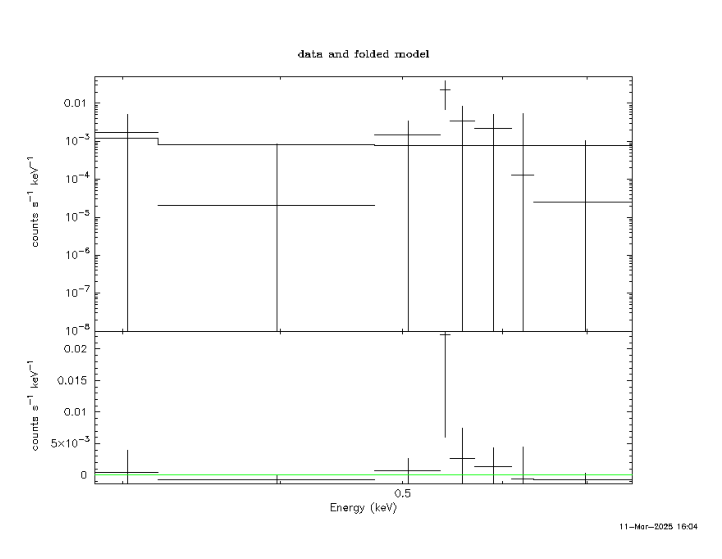

In [24]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bremss_z.png")[0])
plt.imshow(img)
plt.axis('off')

### Apec model
**tbabs :**

In [15]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : C-Statistic                11573.71     using 8 bins.

Test statistic : Chi-Squared              1.001071e+07     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        5:norm
9007.46      6937.31      -3      0.401589       34.3472      0.

(-0.5, 855.5, 655.5, -0.5)

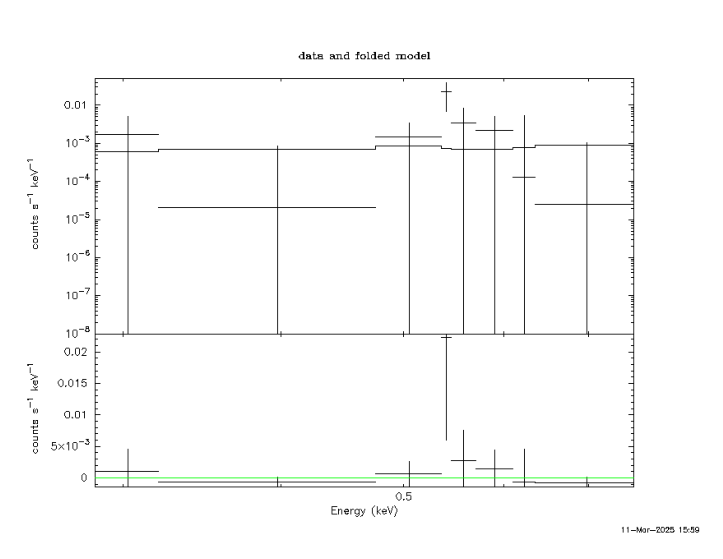

In [16]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_apec.png")[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [26]:
def redshift(d_Mpc):
    H0 = 70 # Hubble constant (km/s/Mpc)
    c = 299792.458 # km/s
    return H0*d_Mpc/c

z = redshift(5124.4652)
print("Redshift : z =", z)
    
AllModels.clear()
moz = Model("ztbabs*apec")
moz.zTBabs.Redshift = z
moz.apec.norm = 0.001
Fit.perform()
Plot.device = "/xs"
Plot("data resid")

Redshift : z = 1.196536318468692

Model zTBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   apec       kT         keV      1.00000      +/-  0.0          
   4    2   apec       Abundanc            1.00000      frozen
   5    2   apec       Redshift            0.0          frozen
   6    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                11076.63     using 8 bins.

Test statistic : Chi-Squared              9.057400e+06     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic                294184.8     using 8 bins.

Test statistic : Chi-Squared             

(-0.5, 856.5, 661.5, -0.5)

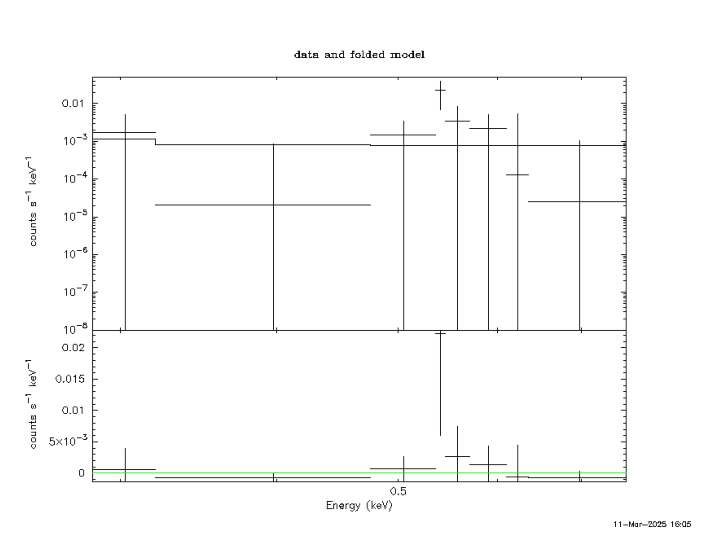

In [28]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_apec_z.png")[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model
**tbabs :**

In [29]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                23434.79     using 8 bins.

Test statistic : Chi-Squared              2.598705e+07     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
3079.44      6436.38      -3      0.436541      -1.07941     0.0163615
226.654      32141.5      -2       81.6452      -2.49042    0.00334090
9.50512      12958.9      -3       13.0366       1.94645   0.000526490
9.4

(-0.5, 859.5, 662.5, -0.5)

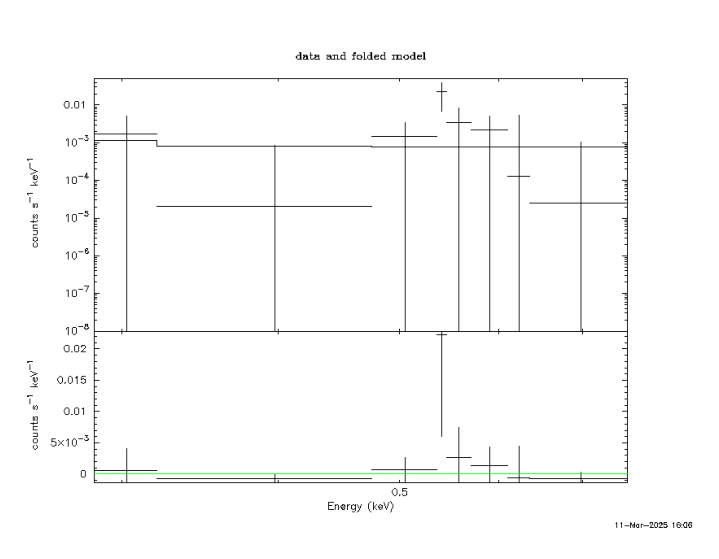

In [30]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_powerlaw.png")[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [31]:
def redshift(d_Mpc):
    H0 = 70 # Hubble constant (km/s/Mpc)
    c = 299792.458 # km/s
    return H0*d_Mpc/c

z = redshift(5124.4652)
print("Redshift : z =", z)
    
AllModels.clear()
moz = Model("ztbabs*powerlaw")
moz.zTBabs.Redshift = z
#moz.apec.norm = 0.001
Fit.perform()
Plot.device = "/xs"
Plot("data resid")

Redshift : z = 1.196536318468692

Model zTBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   4    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                23092.91     using 8 bins.

Test statistic : Chi-Squared              2.516461e+07     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic                295655.6     using 8 bins.

Test statistic : Chi-Squared              5.330504e+09     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and m

(-0.5, 855.5, 655.5, -0.5)

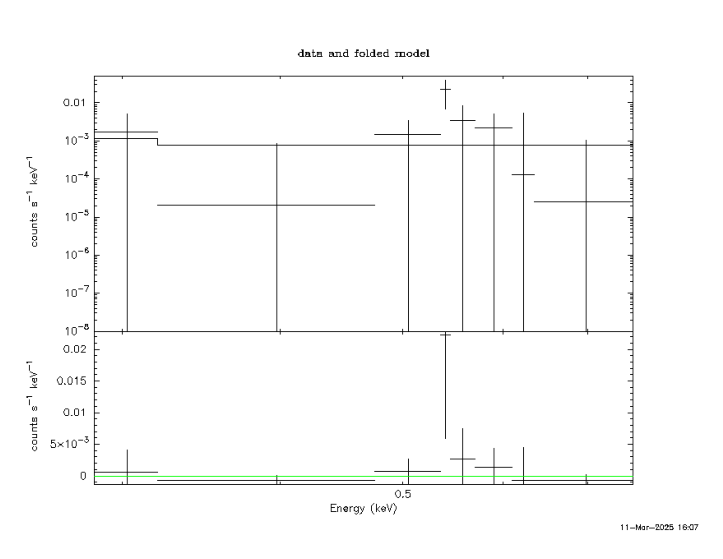

In [32]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_powerlaw_z.png")[0])
plt.imshow(img)
plt.axis('off')

### Black body + Powerlaw model
**tbabs :**

In [34]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw)")
mo.bbody.norm = 0.001
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                45477.24     using 8 bins.

Test statistic : Chi-Squared              9.549528e+07     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic                23456.83     using 8 bins.

Test statistic : Chi-Squared              2.603454e+07     using 8 bins.
 Null hypothesis probabil

(-0.5, 857.5, 659.5, -0.5)

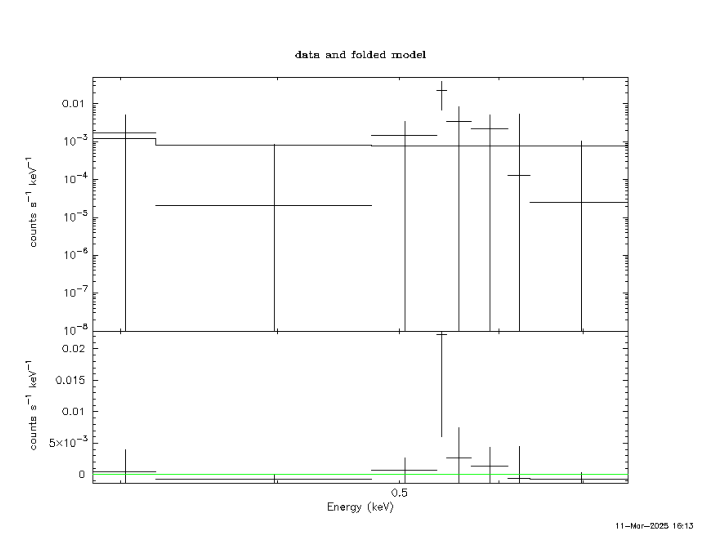

In [35]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bbodypowerlaw.png")[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [37]:
def redshift(d_Mpc):
    H0 = 70 # Hubble constant (km/s/Mpc)
    c = 299792.458 # km/s
    return H0*d_Mpc/c

z = redshift(5124.4652)
print("Redshift : z =", z)
    
AllModels.clear()
moz = Model("ztbabs*(bbody+powerlaw)")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")

Redshift : z = 1.196536318468692

Model zTBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   bbody      kT         keV      3.00000      +/-  0.0          
   4    2   bbody      norm                1.00000      +/-  0.0          
   5    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   6    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                45066.16     using 8 bins.

Test statistic : Chi-Squared              9.368830e+07     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic                357798.3     using 8 bins.

T

(-0.5, 856.5, 657.5, -0.5)

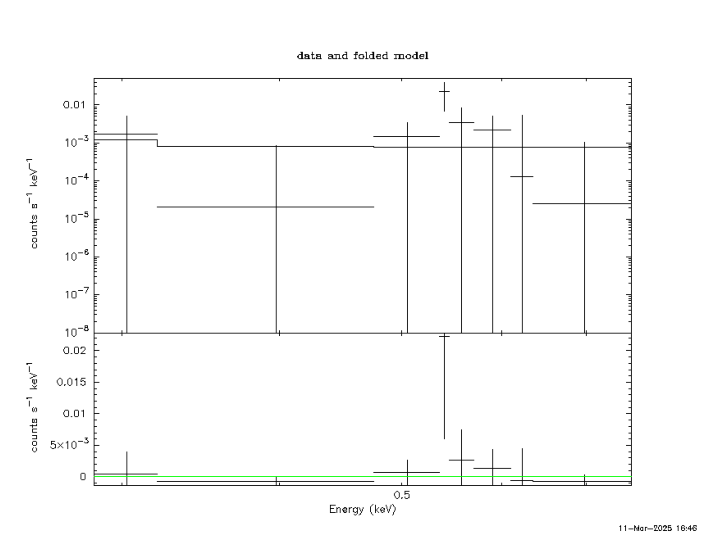

In [38]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bbodypowerlaw_z.png")[0])
plt.imshow(img)
plt.axis('off')

### Bremss + Powerlaw model
**tbabs :**

In [40]:
AllModels.clear()
mo = Model("tbabs*(bremss+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>(bremss<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                36431.14     using 8 bins.

Test statistic : Chi-Squared              6.318113e+07     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
9.62503      5610.54     

(-0.5, 856.5, 661.5, -0.5)

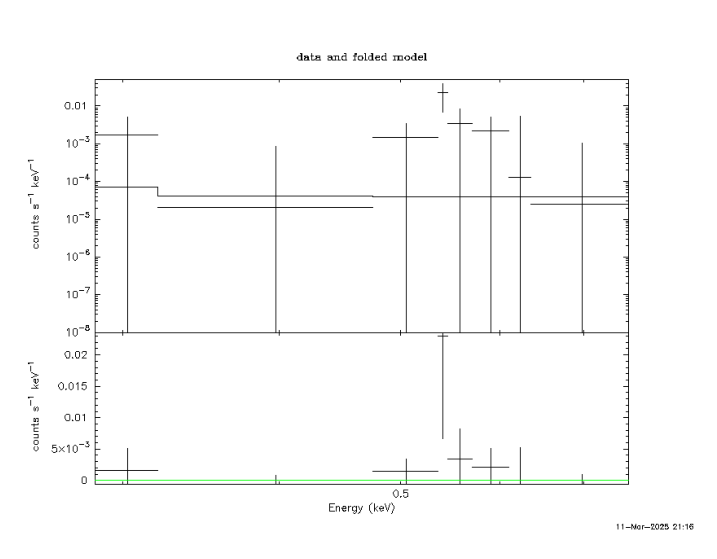

In [41]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bremsspowerlaw.png")[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [42]:
def redshift(d_Mpc):
    H0 = 70 # Hubble constant (km/s/Mpc)
    c = 299792.458 # km/s
    return H0*d_Mpc/c

z = redshift(5124.4652)
print("Redshift : z =", z)
    
AllModels.clear()
moz = Model("ztbabs*(bremss+powerlaw)")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")

Redshift : z = 1.196536318468692

Model zTBabs<1>(bremss<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   bremss     kT         keV      7.00000      +/-  0.0          
   4    2   bremss     norm                1.00000      +/-  0.0          
   5    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   6    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                35814.03     using 8 bins.

Test statistic : Chi-Squared              6.081555e+07     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic                540992.9     using 8 bins.



(-0.5, 861.5, 660.5, -0.5)

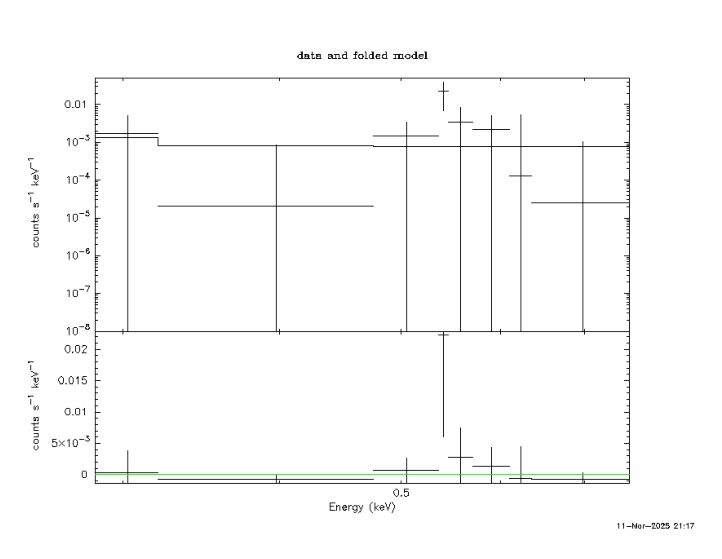

In [43]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bremsspowerlaw_z.png")[0])
plt.imshow(img)
plt.axis('off')

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :** from ESASky

- RA = 53.2571070°
- Dec = -27.9719507°

53.26 -27.97

**Column density :** nH = 3*10^20 cm^-2

The different models give a column density of :

- bbody (tbabs) : nH = 41.3623*10^22
	- bbody (ztbabs) : nH = 7.42389*10^8
- bremss (tbabs) : nH = 917.347*10^22
	- bremss (ztbabs) : nH = 546.463*10^22
- apec (tbabs) : nH = 4.83609*10^13
	- apec (ztbabs) : nH = 433.364*10^22
- powerlaw (tbabs) : nH = 41.2377*10^22
	- powerlaw (ztbabs) : nH = 97.2311*10^22
- bbody+powerlaw (tbabs) : nH = 744.921*10^22
	- bbody+powerlaw (tbabs) : nH = 384.060*10^22
- bremss+powerlaw (tbabs) : nH = 4278.65*10^22
	- bremss+powerlaw (ztbabs) : nH = 3447.44*10^22

## Flux
**X-ray flux :**

In [16]:
AllModels.calcFlux(".2 12.0")

Spectrum Number: 1, 2, 3, 4
Data Group Number: 1
 Model Flux 2.3875e-05 photons (1.1022e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [3]:
Flux = 1.1022e-13 # ergs/cm^2/s

**Optical flux :**

In [5]:
def F_optical(mag):
    F0 = 2.5*10**(-6) # Flux de référence en ergs/cm^2/s correspondant à une magnitude nulle dans la bande concernée, ici G.
    return F0*10**(-0.4*mag)
    
G_blue = 20.5353
G_yellow = 16.1475

Flux_blue = F_optical(G_blue)
Flux_yellow = F_optical(G_yellow)

print(color.BOLD+"Blue source (GAIA)"+color.END)
print(f"Optical flux : {Flux_blue} ergs/cm^2/s")
print()
print(color.BOLD+"Yellow source (GAIA)"+color.END)
print(f"Optical flux : {Flux_yellow} ergs/cm^2/s")

Blue source (GAIA)
Optical flux : 1.5269330967635355e-14 ergs/cm^2/s

Yellow source (GAIA)
Optical flux : 8.688404036080134e-13 ergs/cm^2/s


**Ratio F_x-ray/F_optical :**

In [6]:
print(color.BOLD+"Blue source (GAIA)"+color.END)
print(f"Ratio F_x-ray/F_optical = {Flux/Flux_blue}")
print()
print(color.BOLD+"Yellow source (GAIA)"+color.END)
print(f"Ratio F_x-ray/F_optical = {Flux/Flux_yellow}")

Blue source (GAIA)
Ratio F_x-ray/F_optical = 7.218390919262976

Yellow source (GAIA)
Ratio F_x-ray/F_optical = 0.12685874130886635


## Luminosity

In [4]:
"""GAIA"""

P_mas = 2.4442 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"Source bleue (GAIA)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosité : {Luminosity} erg/s")
print()

"""GAIA"""

P_mas = 1.469 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"Source jaune (GAIA)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosité : {Luminosity} erg/s")
print()

"""GLADE"""

d_kpc = 5124465.2 # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"Source jaune (GLADE)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosité : {Luminosity} erg/s")

Source bleue (GAIA)
Distance : 1.2624580639882173e+21 cm
Luminosité : 2.207517688529204e+30 erg/s

Source jaune (GAIA)
Distance : 2.1005445881552078e+21 cm
Luminosité : 6.111306707388866e+30 erg/s

Source jaune (GLADE)
Distance : 1.581256226764e+28 cm
Luminosité : 3.4631776347869527e+44 erg/s
